In [1]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 15 newly installed, 0 to remove and 37 not upgraded.
Need to get 43.5 MB of archives.
After this 

In [2]:
# Sklearn and Pandas Setup

import pandas as pd
print(pd.__version__ == '1.1.5')
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
from sklearn.preprocessing import LabelEncoder

True


In [3]:
!apt update
!apt install gcc python-dev libkrb5-dev

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download

In [4]:
co2_df = pd.read_csv('/content/drive/MyDrive/CIS 545/545 Project/global_average_yearly_temp_with_features_clean.csv')
co2_df.head(5)

,iso_code,year,oil_co2_per_capita,oil_co2,share_global_oil_co2,cumulative_oil_co2,share_global_cumulative_oil_co2,co2_growth_abs,co2_per_capita,co2,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_growth_prct,population,AvgYearlyTemp
0,FRA,1855,0.001,0.037,100.00,0.037,100.00,3.858,0.899,33.071,12.71,469.655,7.96,13.21,36768948.0,11.763583
1,FRA,1856,0.001,0.040,100.00,0.077,100.00,1.561,0.940,34.632,12.49,504.287,8.17,4.72,36853256.0,12.615917
2,FRA,1857,0.001,0.044,85.71,0.121,94.29,0.649,0.955,35.281,12.61,539.568,8.36,1.87,36937755.0,12.823250
3,FRA,1858,0.001,0.048,76.47,0.169,88.46,-0.685,0.934,34.595,12.17,574.163,8.52,-1.94,37022445.0,12.382083
4,FRA,1859,0.001,0.048,86.67,0.216,88.06,0.396,0.943,34.991,11.61,609.155,8.65,1.14,37110539.0,13.107500


In [5]:
iso_codes = co2_df['iso_code']
iso_codes_le = LabelEncoder()
iso_codes_le.fit(iso_codes)
co2_df['iso_code_labels'] = iso_codes_le.transform(co2_df['iso_code'])
co2_le_df = co2_df[['iso_code_labels', 'year', 'oil_co2_per_capita', 'oil_co2',
       'share_global_oil_co2', 'cumulative_oil_co2',
       'share_global_cumulative_oil_co2', 'co2_growth_abs', 'co2_per_capita',
       'co2', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_growth_prct', 'population',
       'AvgYearlyTemp']]

In [6]:
co2_le_df.dtypes

iso_code_labels                      int64
year                                 int64
oil_co2_per_capita                 float64
oil_co2                            float64
share_global_oil_co2               float64
cumulative_oil_co2                 float64
share_global_cumulative_oil_co2    float64
co2_growth_abs                     float64
co2_per_capita                     float64
co2                                float64
share_global_co2                   float64
cumulative_co2                     float64
share_global_cumulative_co2        float64
co2_growth_prct                    float64
population                         float64
AvgYearlyTemp                      float64
dtype: object

In [7]:
co2_maxes = [co2_le_df['iso_code_labels'].max(), co2_le_df['year'].max(),
             co2_le_df['oil_co2_per_capita'].max(), co2_le_df['oil_co2'].max(), 
             co2_le_df['share_global_oil_co2'].max(), co2_le_df['cumulative_oil_co2'].max(),
             co2_le_df['share_global_cumulative_oil_co2'].max(), co2_le_df['co2_growth_abs'].max(),
             co2_le_df['co2_per_capita'].max(), co2_le_df['co2'].max(),
             co2_le_df['share_global_co2'].max(), co2_le_df['cumulative_co2'].max(),
             co2_le_df['co2_growth_prct'].max(),co2_le_df['population'].max(),
             co2_le_df['AvgYearlyTemp'].max()]
co2_mins = [co2_le_df['iso_code_labels'].min(), co2_le_df['year'].min(),
            co2_le_df['oil_co2_per_capita'].min(), co2_le_df['oil_co2'].min(), 
            co2_le_df['share_global_oil_co2'].min(), co2_le_df['cumulative_oil_co2'].min(),
            co2_le_df['share_global_cumulative_oil_co2'].min(), co2_le_df['co2_growth_abs'].min(),
            co2_le_df['co2_per_capita'].min(), co2_le_df['co2'].min(),
            co2_le_df['share_global_co2'].min(), co2_le_df['cumulative_co2'].min(),
            co2_le_df['co2_growth_prct'].min(),co2_le_df['population'].min(),
            co2_le_df['AvgYearlyTemp'].min()]
co2_stds = [co2_le_df['iso_code_labels'].std(), co2_le_df['year'].std(),
            co2_le_df['oil_co2_per_capita'].std(), co2_le_df['oil_co2'].std(), 
            co2_le_df['share_global_oil_co2'].std(), co2_le_df['cumulative_oil_co2'].std(),
            co2_le_df['share_global_cumulative_oil_co2'].std(), co2_le_df['co2_growth_abs'].std(),
            co2_le_df['co2_per_capita'].std(), co2_le_df['co2'].std(),
            co2_le_df['share_global_co2'].std(), co2_le_df['cumulative_co2'].std(),
            co2_le_df['co2_growth_prct'].std(),co2_le_df['population'].std(),
            co2_le_df['AvgYearlyTemp'].std()]
co2_means = [co2_le_df['iso_code_labels'].mean(), co2_le_df['year'].mean(),
             co2_le_df['oil_co2_per_capita'].mean(), co2_le_df['oil_co2'].mean(), 
             co2_le_df['share_global_oil_co2'].mean(), co2_le_df['cumulative_oil_co2'].mean(),
             co2_le_df['share_global_cumulative_oil_co2'].mean(), co2_le_df['co2_growth_abs'].mean(),
             co2_le_df['co2_per_capita'].mean(), co2_le_df['co2'].mean(),
             co2_le_df['share_global_co2'].mean(), co2_le_df['cumulative_co2'].mean(),
             co2_le_df['co2_growth_prct'].mean(),co2_le_df['population'].mean(),
             co2_le_df['AvgYearlyTemp'].mean()]
print(co2_maxes)
print(co2_mins)
print(co2_stds)
print(co2_means)

[169, 2013, 117.074, 1234.622, 100.0, 29636.441000000003, 100.0, 911.903, 117.074, 9952.744, 28.21, 164641.241, 20100.0, 1391883335.0, 30.74475]
[0, 1855, 0.0, 0.0, 0.0, 0.0, 0.0, -484.209, 0.0, 0.001, 0.0, 0.005, -97.31, 1606.0, -20.446833333333327]
[49.141037979806526, 36.31320850309408, 5.069324021416378, 65.53871129465425, 2.00414917301564, 1760.8809615665916, 2.048854425789231, 20.647831755660107, 7.501548129944552, 280.1851562747391, 1.6539905741050949, 6989.705089669289, 261.01291368905214, 97458627.968185, 9.51062917030768]
[84.59564344658389, 1965.7389785146086, 2.031057988253668, 19.816517879711462, 0.4445424132035285, 492.1741074269563, 0.4054323098654781, 1.8169498178574193, 3.848366218125045, 57.6736932570069, 0.4725031596164261, 1752.669691844469, 16.451691324065184, 23887302.032042228, 17.041792875581358]


In [8]:
print(co2_maxes[14])
print(co2_mins[14])

30.74475
-20.446833333333327


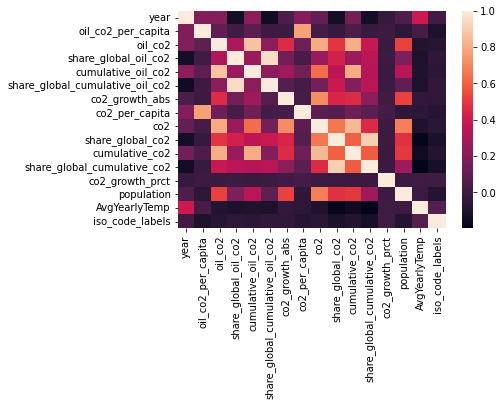

In [9]:
co2_corr = co2_df.corr()
sns.heatmap(co2_corr)

*   High correlation between cumulative_co2 and {oil_o2, cumulative_oil_co2}
*   High correlation between co2_per_capita and oil_co2_per_capita
*   Correlation between population and co2
*   Low correlation between AvgYearlyTemp and all features except year

In [10]:
combined_data_sec_2 = co2_le_df.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('/content/co2_le.csv')

# Modelling

In [11]:
!apt install libkrb5-dev
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.16-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
--2021-12-13 02:10:19--  https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz’

spark-3.1.2-bin-had 100%[===================>] 218.23M  78.3MB/s    in 2.8s    

2021-12-13 02:10:22 (78.3 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz’ saved [228834641/228834641]

     |████████████████████████████████| 43 kB 1.3 MB/s 
     |████████████████████████████████| 154 kB 28.8 MB/s 
     |████████████████████████████████| 3.6 

In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('ml-hw4').getOrCreate()

In [13]:
%load_ext sparkmagic.magics

In [14]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [15]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

In [16]:
co2_sdf = spark.read.csv("/content/co2_le.csv", header=True, inferSchema=True)
co2_sdf.show()

+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+
|_c0|iso_code_labels|year|oil_co2_per_capita|             oil_co2|share_global_oil_co2|  cumulative_oil_co2|share_global_cumulative_oil_co2|      co2_growth_abs|      co2_per_capita|                 co2|share_global_co2|      cumulative_co2|share_global_cumulative_co2|co2_growth_prct| population|     AvgYearlyTemp|
+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+
|  0|             53|1855|             0.001|0.03

In [17]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [18]:
co2_sdf.columns

['_c0',
 'iso_code_labels',
 'year',
 'oil_co2_per_capita',
 'oil_co2',
 'share_global_oil_co2',
 'cumulative_oil_co2',
 'share_global_cumulative_oil_co2',
 'co2_growth_abs',
 'co2_per_capita',
 'co2',
 'share_global_co2',
 'cumulative_co2',
 'share_global_cumulative_co2',
 'co2_growth_prct',
 'population',
 'AvgYearlyTemp']

# Random Splitting Models

## Choosing all columns as features

In [19]:
columns_to_use = ['iso_code_labels','year','oil_co2_per_capita','oil_co2','share_global_oil_co2',
                  'cumulative_oil_co2','share_global_cumulative_oil_co2','co2_growth_abs',
                  'co2_per_capita','co2','share_global_co2','cumulative_co2',
                  'share_global_cumulative_co2','co2_growth_prct','population']

In [20]:
assembler = VectorAssembler(inputCols=columns_to_use, outputCol="features")

In [21]:
from pyspark.ml import Pipeline

modified_data_sdf = assembler.transform(co2_sdf)
modified_data_sdf.show()

+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+--------------------+
|_c0|iso_code_labels|year|oil_co2_per_capita|             oil_co2|share_global_oil_co2|  cumulative_oil_co2|share_global_cumulative_oil_co2|      co2_growth_abs|      co2_per_capita|                 co2|share_global_co2|      cumulative_co2|share_global_cumulative_co2|co2_growth_prct| population|     AvgYearlyTemp|            features|
+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+--------

In [22]:
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed=24)

### Linear Regression

In [23]:
from pyspark.ml.regression import LinearRegression

# TODO define model
lr = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=5, regParam=0, elasticNetParam = 0)


# fit on training data
clfModel = lr.fit(train_sdf)

In [24]:
from pyspark.ml.evaluation import RegressionEvaluator

# prediction and evaluation
prediction = clfModel.transform(train_sdf)
evaluator = RegressionEvaluator()
evaluator.setPredictionCol('prediction')
evaluator.setLabelCol('AvgYearlyTemp')

RegressionEvaluator_2c25dd871967

In [25]:
lr_training_mae = evaluator.evaluate(prediction, {evaluator.metricName: "mae"})
lr_training_mse = evaluator.evaluate(prediction, {evaluator.metricName: "mse"})
lr_test_prediction = clfModel.transform(test_sdf)
lr_test_mae = evaluator.evaluate(lr_test_prediction, {evaluator.metricName: "mae"})
lr_test_mse = evaluator.evaluate(lr_test_prediction, {evaluator.metricName: "mse"})

print("training mse:",lr_training_mse, "    training mae:", lr_training_mae)
print("    test mse:",lr_test_mse, "        test mae:", lr_test_mae)

training mse: 69.88982640680005     training mae: 6.712819691130782
    test mse: 66.79354730406963         test mae: 6.545596668984783


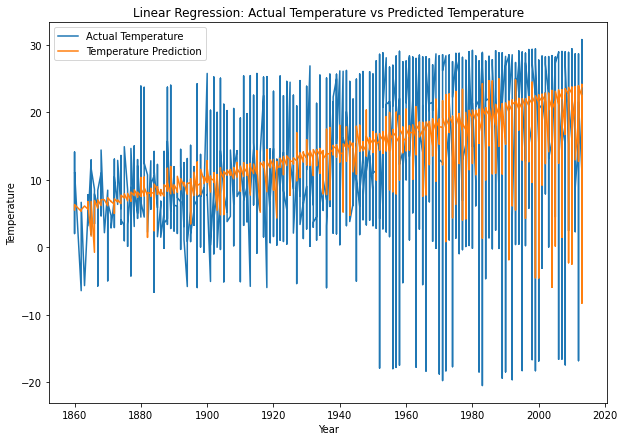

In [26]:
lr_df = lr_test_prediction.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(lr_df['year'], lr_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(lr_df['year'], lr_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Linear Regression: Actual Temperature vs Predicted Temperature")
plt.show()

In [27]:
# LASSO L1
lasso = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=0, elasticNetParam = 1)
lassoModel = lasso.fit(train_sdf)
prediction = lassoModel.transform(train_sdf)
lasso_test_prediction = lassoModel.transform(test_sdf)
l1_mse = evaluator.evaluate(lasso_test_prediction, {evaluator.metricName: "mse"})
l1_mae = evaluator.evaluate(lasso_test_prediction, {evaluator.metricName: "mae"})

# RIDGE L2 TO DO
ridge = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=1, elasticNetParam = 0)
ridgeModel = ridge.fit(train_sdf)
prediction = ridgeModel.transform(train_sdf)
ridge_test_prediction = ridgeModel.transform(test_sdf)
l2_mse = evaluator.evaluate(ridge_test_prediction, {evaluator.metricName: "mse"})
l2_mae = evaluator.evaluate(ridge_test_prediction, {evaluator.metricName: "mae"})

# Some variant of elastic net TO DO
elastic = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=1, elasticNetParam = 1)
elasticModel = elastic.fit(train_sdf)
prediction = elasticModel.transform(train_sdf)
elastic_test_prediction = elasticModel.transform(test_sdf)
elastic_mse = evaluator.evaluate(elastic_test_prediction, {evaluator.metricName: "mse"})
elastic_mae = evaluator.evaluate(elastic_test_prediction, {evaluator.metricName: "mae"})

In [28]:
print("      lasso test mse:",l1_mse, "          lasso test mae:", l1_mae)
print("      ridge test mse:",l2_mse, "          ridge test mae:", l2_mae)
print("elastic net test mse:",elastic_mse, "    elastic net test mae:", elastic_mae)

      lasso test mse: 66.79354730406963           lasso test mae: 6.545596668984783
      ridge test mse: 67.51166289962879           ridge test mae: 6.687138370982423
elastic net test mse: 72.08868110916873     elastic net test mae: 7.09884759707322


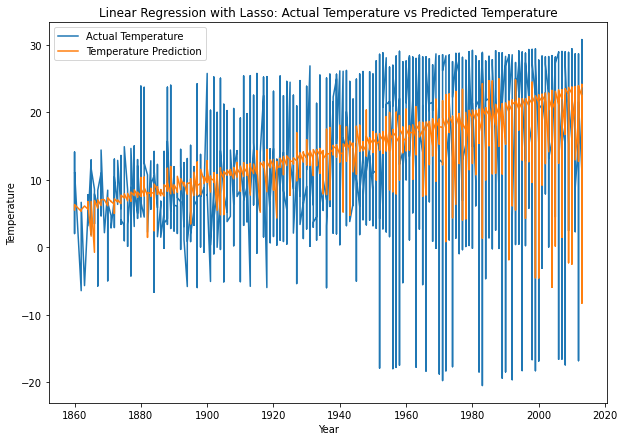

In [29]:
# Plotting Lasso
lr_lasso_df = lasso_test_prediction.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(lr_lasso_df['year'], lr_lasso_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(lr_lasso_df['year'], lr_lasso_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Linear Regression with Lasso: Actual Temperature vs Predicted Temperature")
plt.show()

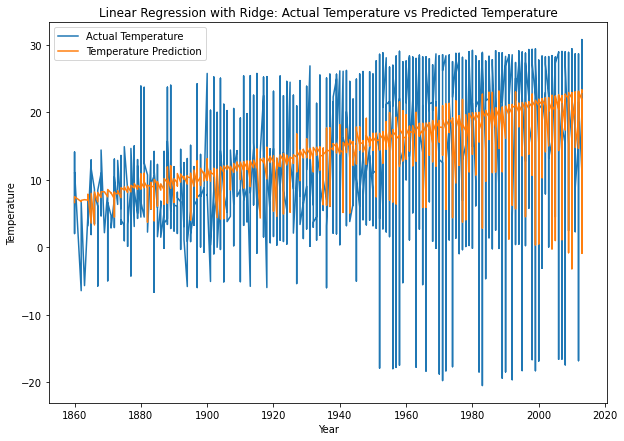

In [30]:
# Plotting Ridge
lr_ridge_df = ridge_test_prediction.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(lr_ridge_df['year'], lr_ridge_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(lr_ridge_df['year'], lr_ridge_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Linear Regression with Ridge: Actual Temperature vs Predicted Temperature")
plt.show()

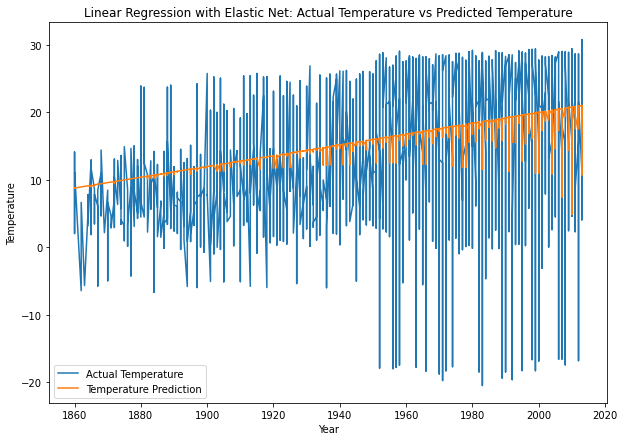

In [31]:
# Plotting elastic net
lr_elastic_df = elastic_test_prediction.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(lr_elastic_df['year'], lr_elastic_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(lr_elastic_df['year'], lr_elastic_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='lower left')
plt.title("Linear Regression with Elastic Net: Actual Temperature vs Predicted Temperature")
plt.show()

### RandomForestRegression

In [32]:
from pyspark.ml.regression import RandomForestRegressor

# define model
rfc = RandomForestRegressor(featuresCol="features",labelCol="AvgYearlyTemp", maxDepth = 10, numTrees=50)
# fit on training data
rfModel = rfc.fit(train_sdf)


In [33]:
# predictions
rf_train_prediction = rfModel.transform(train_sdf)
rf_test_prediction = rfModel.transform(test_sdf)

In [34]:
# evaluate predictions
train_mse = evaluator.evaluate(rf_train_prediction, {evaluator.metricName: "mse"})
train_mae = evaluator.evaluate(rf_train_prediction, {evaluator.metricName: "mae"})
test_mse = evaluator.evaluate(rf_test_prediction, {evaluator.metricName: "mse"})
test_mae = evaluator.evaluate(rf_test_prediction, {evaluator.metricName: "mae"})
print("train mse:", train_mse, "train mae:", train_mae)
print(" test mse:", test_mse, " test mae:", test_mae)

train mse: 5.889895334027469 train mae: 1.7312070562276884
 test mse: 7.550969266026411  test mae: 1.9497179420465254


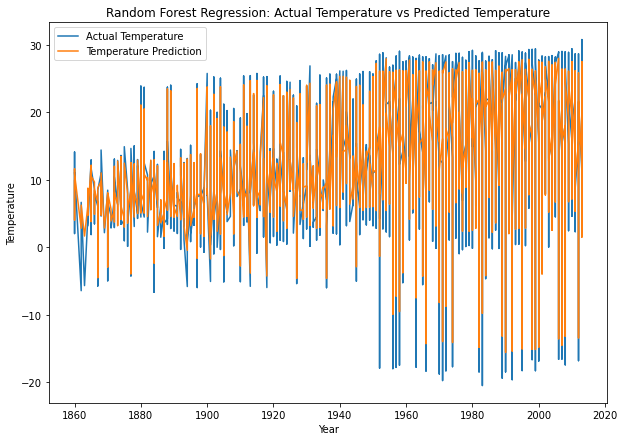

In [35]:
# Plotting random forest regressor
rf_df = rf_test_prediction.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(rf_df['year'], rf_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(rf_df['year'], rf_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Random Forest Regression: Actual Temperature vs Predicted Temperature")
plt.show()

### PCA

In [36]:
# TODO initialize a PCA model
from pyspark.ml import Pipeline
from pyspark.ml.feature import PCA

pca = PCA(k=8, inputCol="features", outputCol="pcaFeatures")

In [37]:
# Set up PCA using Lasso Linear Regression
pca_lr = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=5, regParam=0, elasticNetParam = 1)
# Fit the model using the training data
pca_pipe = Pipeline(stages=[assembler,pca, pca_lr])

In [38]:
# Get the PCA feature from the trained model
pca_train_sdf = train_sdf.drop("features")
pca_model = pca_pipe.fit(pca_train_sdf)

In [39]:
# Train a logistic regression model using the PCA features
pca_train_prediction = pca_model.transform(pca_train_sdf)

pca_test_sdf = test_sdf.drop("features")
pca_test_prediction = pca_model.transform(pca_test_sdf)

In [40]:
# k=8 TODO evaluate predictions
pca_training_mse = evaluator.evaluate(pca_train_prediction, {evaluator.metricName: "mse"})
pca_training_mae = evaluator.evaluate(pca_train_prediction, {evaluator.metricName: "mae"})
pca_test_mse = evaluator.evaluate(pca_test_prediction, {evaluator.metricName: "mse"})
pca_test_mae = evaluator.evaluate(pca_test_prediction, {evaluator.metricName: "mae"})
print("training mse:", pca_training_mse, "   training mae:", pca_training_mae)
print("    test mse:", pca_test_mse, "       test mae:", pca_test_mae)

training mse: 69.88982640680005    training mae: 6.712819691130782
    test mse: 66.79354730406963        test mae: 6.545596668984783


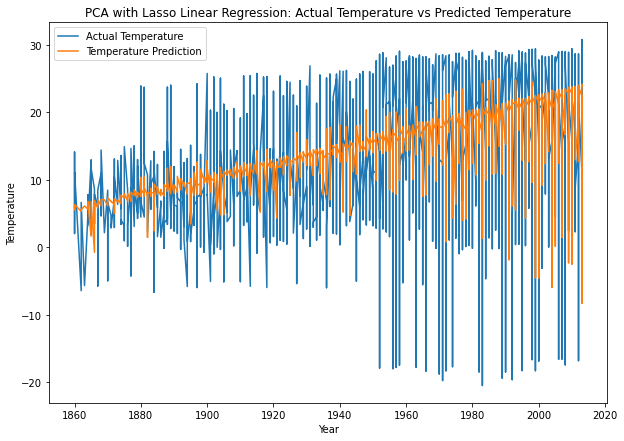

In [41]:
#Plot PCA
pca_df = pca_test_prediction.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(pca_df['year'], pca_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(pca_df['year'], pca_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("PCA with Lasso Linear Regression: Actual Temperature vs Predicted Temperature")
plt.show()

## Choosing main columns as features

In [42]:
# remove duplicate columns
columns_to_use_2 = ['iso_code_labels','year','co2','co2_growth_prct','population']
modified_co2_sdf = co2_sdf['iso_code_labels','year','co2','co2_growth_prct','population','AvgYearlyTemp']

In [43]:
assembler2 = VectorAssembler(inputCols=columns_to_use_2, outputCol="features")

In [44]:
from pyspark.ml import Pipeline

modified_co2_sdf = assembler2.transform(modified_co2_sdf)
modified_co2_sdf.show()

+---------------+----+--------------------+---------------+-----------+------------------+--------------------+
|iso_code_labels|year|                 co2|co2_growth_prct| population|     AvgYearlyTemp|            features|
+---------------+----+--------------------+---------------+-----------+------------------+--------------------+
|             53|1855|              33.071|          13.21|3.6768948E7|11.763583333333335|[53.0,1855.0,33.0...|
|             53|1856|              34.632|           4.72|3.6853256E7|12.615916666666665|[53.0,1856.0,34.6...|
|             53|1857|              35.281|           1.87|3.6937755E7|12.823250000000002|[53.0,1857.0,35.2...|
|             53|1858|              34.595|          -1.94|3.7022445E7|12.382083333333336|[53.0,1858.0,34.5...|
|             53|1859|              34.991|           1.14|3.7110539E7|           13.1075|[53.0,1859.0,34.9...|
|            136|1859|               0.004|            0.0|  8499134.0| 9.252083333333333|[136.0,1859.0,

In [45]:
train_sdf_2, test_sdf_2 = modified_co2_sdf.randomSplit([0.8, 0.2], seed=24)

### Linear Regression

In [46]:
# Regular Linear Regression
# fit on training data
lr_2 = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=0, elasticNetParam = 0)
clfModel_2 = lr_2.fit(train_sdf_2)
lr_training_prediction_2 = clfModel_2.transform(train_sdf_2)
lr_training_mse_2 = evaluator.evaluate(lr_training_prediction_2, {evaluator.metricName: "mse"})
lr_training_mae_2 = evaluator.evaluate(lr_training_prediction_2, {evaluator.metricName: "mae"})
lr_test_prediction_2 = clfModel_2.transform(test_sdf_2)
lr_test_mse_2 = evaluator.evaluate(lr_test_prediction_2, {evaluator.metricName: "mse"})
lr_test_mae_2 = evaluator.evaluate(lr_test_prediction_2, {evaluator.metricName: "mae"})

print("training mse:", lr_training_mse_2, "  training mae:", lr_training_mae_2)
print("    test mse:", lr_test_mse_2, "      test mae:", lr_test_mae_2)

training mse: 72.68465473335785   training mae: 6.938894040959976
    test mse: 73.46010710006405       test mae: 6.87475433144544


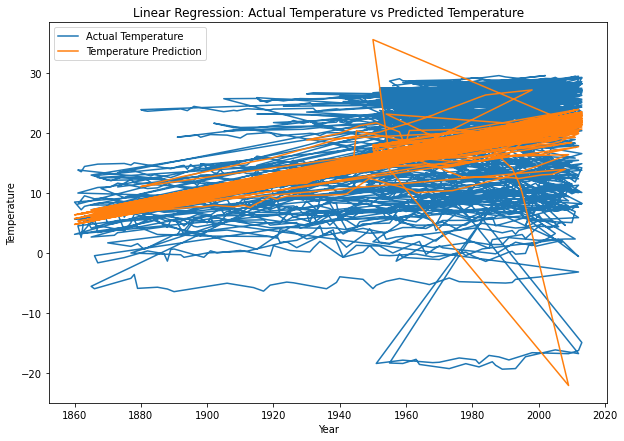

In [47]:
lr_2_df = lr_test_prediction_2.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(lr_2_df['year'], lr_2_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(lr_2_df['year'], lr_2_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Linear Regression: Actual Temperature vs Predicted Temperature")
plt.show()

In [48]:
# LASSO L1
lasso_2 = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=0, elasticNetParam = 1)
lassoModel_2 = lasso_2.fit(train_sdf_2)
lasso_training_prediction_2 = lassoModel_2.transform(train_sdf_2)
lasso_test_prediction_2 = lassoModel_2.transform(test_sdf_2)
lasso_test_prediction_2_mse = evaluator.evaluate(lasso_test_prediction_2, {evaluator.metricName: "mse"})
lasso_test_prediction_2_mae = evaluator.evaluate(lasso_test_prediction_2, {evaluator.metricName: "mae"})

# RIDGE L2
ridge_2 = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=1, elasticNetParam = 0)
ridgeModel_2 = ridge_2.fit(train_sdf_2)
ridge_training_prediction_2 = ridgeModel_2.transform(train_sdf_2)
ridge_test_prediction_2 = ridgeModel_2.transform(test_sdf_2)
ridge_test_prediction_2_mse = evaluator.evaluate(ridge_test_prediction_2, {evaluator.metricName: "mse"})
ridge_test_prediction_2_mae = evaluator.evaluate(ridge_test_prediction_2, {evaluator.metricName: "mae"})

# elastic net
elastic_2 = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=1, elasticNetParam = 1)
elasticModel_2 = elastic_2.fit(train_sdf_2)
elastic_training_prediction_2 = elasticModel_2.transform(train_sdf_2)
elastic_test_prediction_2 = elasticModel_2.transform(test_sdf_2)
elastic_test__prediction_2_mse = evaluator.evaluate(elastic_test_prediction_2, {evaluator.metricName: "mse"})
elastic_test__prediction_2_mae = evaluator.evaluate(elastic_test_prediction_2, {evaluator.metricName: "mae"})

In [49]:
print("  lasso test mse:", lasso_test_prediction_2_mse, '    lasso test mae:', lasso_test_prediction_2_mae)
print("  ridge test mse:", lasso_test_prediction_2_mse, '    ridge test mae:', ridge_test_prediction_2_mae)
print("elastic test mse:", elastic_test__prediction_2_mse, '  elastic test mae:', elastic_test__prediction_2_mae)

  lasso test mse: 73.46010710006405     lasso test mae: 6.87475433144544
  ridge test mse: 73.46010710006405     ridge test mae: 6.973080921492441
elastic test mse: 76.91491901033511   elastic test mae: 7.29139794321026


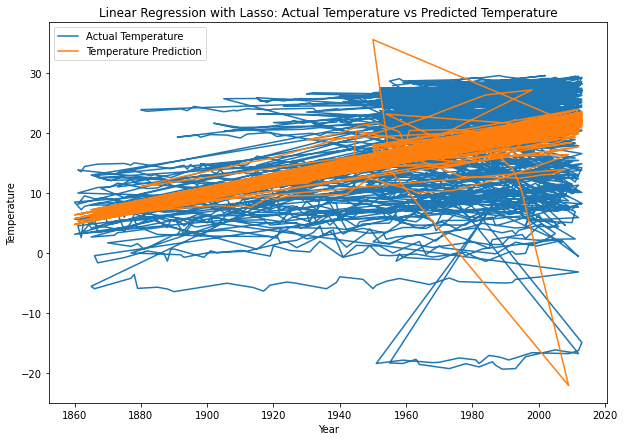

In [50]:
lasso_2_df = lasso_test_prediction_2.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(lasso_2_df['year'], lasso_2_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(lasso_2_df['year'], lasso_2_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Linear Regression with Lasso: Actual Temperature vs Predicted Temperature")
plt.show()

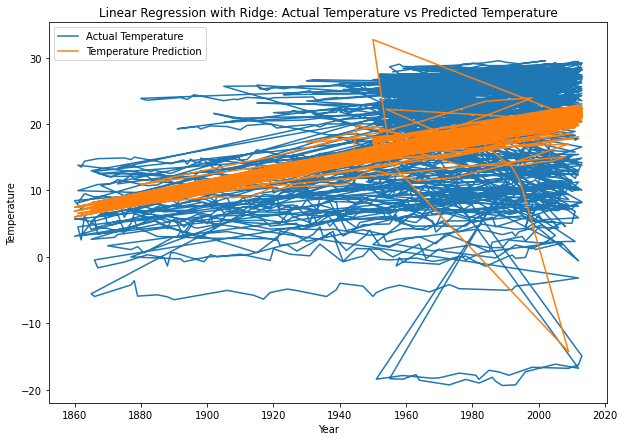

In [51]:
ridge_2_df = ridge_test_prediction_2.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(ridge_2_df['year'], ridge_2_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(ridge_2_df['year'], ridge_2_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Linear Regression with Ridge: Actual Temperature vs Predicted Temperature")
plt.show()

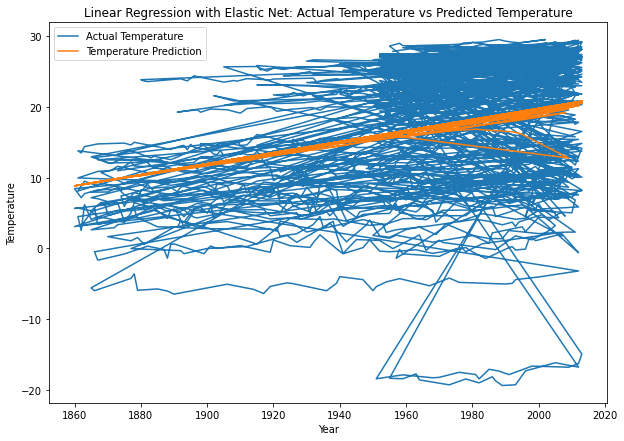

In [52]:
elastic_2_df = elastic_test_prediction_2.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(elastic_2_df['year'], elastic_2_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(elastic_2_df['year'], elastic_2_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Linear Regression with Elastic Net: Actual Temperature vs Predicted Temperature")
plt.show()

### RandomForestRegression

In [53]:
rfc_2 = RandomForestRegressor(featuresCol="features",labelCol="AvgYearlyTemp", maxDepth = 10, numTrees=50)
rfModel_2 = rfc_2.fit(train_sdf_2)
rf_train_prediction_2 = rfModel_2.transform(train_sdf_2)
rf_test_prediction_2 = rfModel_2.transform(test_sdf_2)
rf_train_prediction_mse_2 = evaluator.evaluate(rf_train_prediction_2, {evaluator.metricName: "mse"})
rf_train_prediction_mae_2 = evaluator.evaluate(rf_train_prediction_2, {evaluator.metricName: "mae"})
rf_test_prediction_mse_2 = evaluator.evaluate(rf_test_prediction_2, {evaluator.metricName: "mse"})
rf_test_prediction_mae_2 = evaluator.evaluate(rf_test_prediction_2, {evaluator.metricName: "mae"})

print("training mse:",rf_train_prediction_mse_2, "    training mae:", rf_train_prediction_mae_2)
print("    test mse:",rf_test_prediction_mse_2, "          test mae:", rf_test_prediction_mae_2)

training mse: 10.611352423984048     training mae: 2.3308881091929905
    test mse: 13.902282307140615           test mae: 2.6090971484001932


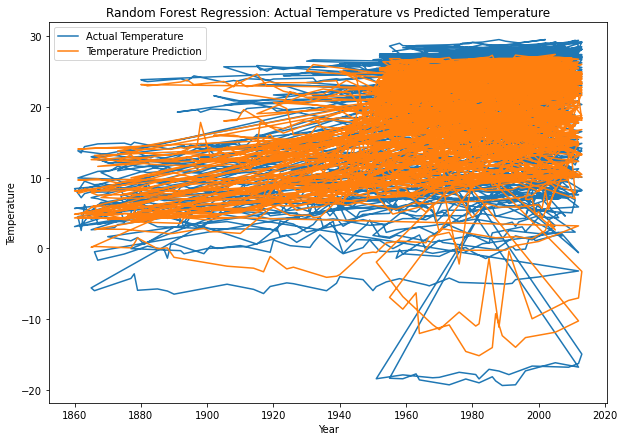

In [54]:
rf_2_df = rf_test_prediction_2.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(rf_2_df['year'], rf_2_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(rf_2_df['year'], rf_2_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Random Forest Regression: Actual Temperature vs Predicted Temperature")
plt.show()

### PCA

In [55]:
pca_2 = PCA(k=4, inputCol="features", outputCol="pcaFeatures")
pca_lr_2 = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=1, elasticNetParam = 0)
# Fit the model using the training data
pca_pipe_2 = Pipeline(stages=[assembler2,pca_2, pca_lr_2])

In [56]:
pca_train_sdf_2 = train_sdf_2.drop("features")
pca_model_2 = pca_pipe_2.fit(pca_train_sdf_2)
pca_train_prediction_2 = pca_model_2.transform(pca_train_sdf_2)

pca_test_sdf_2 = test_sdf_2.drop("features")
pca_test_prediction_2 = pca_model_2.transform(pca_test_sdf_2)
pca_training_prediction_2_mse = evaluator.evaluate(pca_train_prediction_2, {evaluator.metricName: "mse"})
pca_training_prediction_2_mae = evaluator.evaluate(pca_train_prediction_2, {evaluator.metricName: "mae"})
pca_test_prediction_2_mse = evaluator.evaluate(pca_test_prediction_2, {evaluator.metricName: "mse"})
pca_test_prediction_2_mae = evaluator.evaluate(pca_test_prediction_2, {evaluator.metricName: "mae"})
print("training mse:", pca_training_prediction_2_mse, "  training mae:", pca_training_prediction_2_mae)
print("    test mse:", pca_test_prediction_2_mse, "       test mae:", pca_test_prediction_2_mae)

training mse: 72.98003396653608   training mae: 7.038014677606666
    test mse: 73.8997774585495        test mae: 6.973080921492441


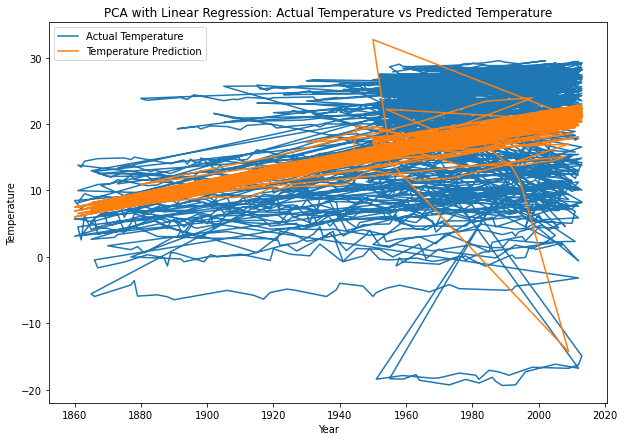

In [57]:
pca_2_df = pca_test_prediction_2.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(pca_2_df['year'], pca_2_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(pca_2_df['year'], pca_2_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("PCA with Linear Regression: Actual Temperature vs Predicted Temperature")
plt.show()

# Split by Year

### Choosing all columns as features

Training and Validation (1750 - 1980)
Testing (1980 - 2013)
and comment on biases

In [58]:
training_sdf = modified_data_sdf[modified_data_sdf['year'] < 1980]
training_sdf.show()

+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+--------------------+
|_c0|iso_code_labels|year|oil_co2_per_capita|             oil_co2|share_global_oil_co2|  cumulative_oil_co2|share_global_cumulative_oil_co2|      co2_growth_abs|      co2_per_capita|                 co2|share_global_co2|      cumulative_co2|share_global_cumulative_co2|co2_growth_prct| population|     AvgYearlyTemp|            features|
+---+---------------+----+------------------+--------------------+--------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------------------+---------------+-----------+------------------+--------

In [59]:
testing_sdf = modified_data_sdf[modified_data_sdf['year'] >= 1980]
testing_sdf.show()

+----+---------------+----+------------------+-------------------+--------------------+------------------+-------------------------------+--------------------+------------------+-------------------+----------------+------------------+---------------------------+---------------+-----------+------------------+--------------------+
| _c0|iso_code_labels|year|oil_co2_per_capita|            oil_co2|share_global_oil_co2|cumulative_oil_co2|share_global_cumulative_oil_co2|      co2_growth_abs|    co2_per_capita|                co2|share_global_co2|    cumulative_co2|share_global_cumulative_co2|co2_growth_prct| population|     AvgYearlyTemp|            features|
+----+---------------+----+------------------+-------------------+--------------------+------------------+-------------------------------+--------------------+------------------+-------------------+----------------+------------------+---------------------------+---------------+-----------+------------------+--------------------+
|7763| 

#### Linear Regression

In [60]:
# Regular Linear Regression
# fit on training data
lr_3 = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=0, elasticNetParam = 0)
clfModel_3 = lr_3.fit(training_sdf)
lr_training_prediction_3 = clfModel_3.transform(training_sdf)
lr_training_mse_3 = evaluator.evaluate(lr_training_prediction_3, {evaluator.metricName: "mse"})
lr_training_mae_3 = evaluator.evaluate(lr_training_prediction_3, {evaluator.metricName: "mae"})
lr_test_prediction_3 = clfModel_3.transform(testing_sdf)
lr_test_mse_3 = evaluator.evaluate(lr_test_prediction_3, {evaluator.metricName: "mse"})
lr_test_mae_3 = evaluator.evaluate(lr_test_prediction_3, {evaluator.metricName: "mae"})

print("training mse:", lr_training_mse_3, "  training mae:", lr_training_mae_3)
print("    test mse:", lr_test_mse_3, "      test mae:", lr_test_mae_3)

training mse: 62.974394026315075   training mae: 6.373988062215199
    test mse: 292.21529280795596       test mae: 8.10532667903945


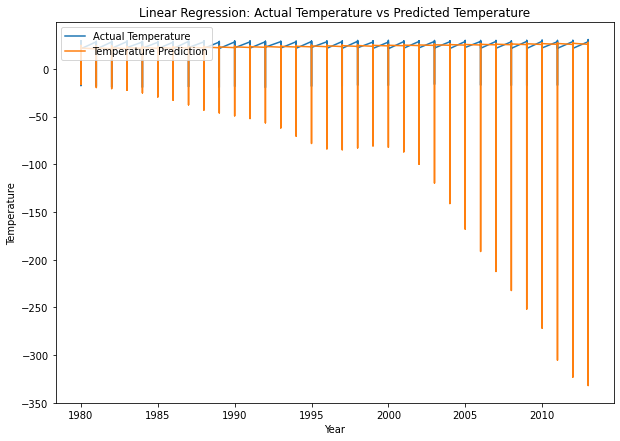

In [61]:
lr_3_df = lr_test_prediction_3.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(lr_3_df['year'], lr_3_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(lr_3_df['year'], lr_3_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Linear Regression: Actual Temperature vs Predicted Temperature")
plt.show()

In [62]:
# LASSO L1
lasso_3 = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=0, elasticNetParam = 1)
lassoModel_3 = lasso_3.fit(training_sdf)
lasso_training_prediction_3 = lassoModel_3.transform(training_sdf)
lasso_test_prediction_3 = lassoModel_3.transform(testing_sdf)
lasso_training_prediction_3_mse = evaluator.evaluate(lasso_training_prediction_3, {evaluator.metricName: "mse"})
lasso_training_prediction_3_mae = evaluator.evaluate(lasso_training_prediction_3, {evaluator.metricName: "mae"})
lasso_test_prediction_3_mse = evaluator.evaluate(lasso_test_prediction_3, {evaluator.metricName: "mse"})
lasso_test_prediction_3_mae = evaluator.evaluate(lasso_test_prediction_3, {evaluator.metricName: "mae"})

# RIDGE L2
ridge_3 = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=1, elasticNetParam = 0)
ridgeModel_3 = ridge_3.fit(training_sdf)
ridge_training_prediction_3 = ridgeModel_3.transform(training_sdf)
ridge_test_prediction_3 = ridgeModel_3.transform(testing_sdf)
ridge_training_prediction_3_mse = evaluator.evaluate(ridge_training_prediction_3, {evaluator.metricName: "mse"})
ridge_training_prediction_3_mae = evaluator.evaluate(ridge_training_prediction_3, {evaluator.metricName: "mae"})
ridge_test_prediction_3_mse = evaluator.evaluate(ridge_test_prediction_3, {evaluator.metricName: "mse"})
ridge_test_prediction_3_mae = evaluator.evaluate(ridge_test_prediction_3, {evaluator.metricName: "mae"})

# elastic net
elastic_3 = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=1, elasticNetParam = 1)
elasticModel_3 = elastic_3.fit(training_sdf)
elastic_training_prediction_3 = elasticModel_3.transform(training_sdf)
elastic_test_prediction_3 = elasticModel_3.transform(testing_sdf)
elastic_training_prediction_3_mse = evaluator.evaluate(lasso_training_prediction_3, {evaluator.metricName: "mse"})
elastic_training_prediction_3_mae = evaluator.evaluate(lasso_training_prediction_3, {evaluator.metricName: "mae"})
elastic_test_prediction_3_mse = evaluator.evaluate(elastic_test_prediction_3, {evaluator.metricName: "mse"})
elastic_test_prediction_3_mae = evaluator.evaluate(elastic_test_prediction_3, {evaluator.metricName: "mae"})

In [63]:
print("lasso training mse:", lasso_training_prediction_3_mse, '    lasso training mae:', lasso_training_prediction_3_mae)
print("    lasso test mse:", lasso_test_prediction_3_mse, '        lasso test mae:', lasso_test_prediction_3_mae)
print()
print("ridge training mse:", lasso_test_prediction_3_mse, '    ridge training mae:', ridge_training_prediction_3_mae)
print("    ridge test mse:", lasso_test_prediction_3_mse, '        ridge test mae:', ridge_test_prediction_3_mae)
print()
print("elastic training mse:", elastic_training_prediction_3_mse, '  elastic training mae:', elastic_training_prediction_3_mae)
print("    elastic test mse:", elastic_test_prediction_3_mse, '       elastic test mae:', elastic_test_prediction_3_mae)

lasso training mse: 62.974394026315075     lasso training mae: 6.373988062215199
    lasso test mse: 292.21529280795596         lasso test mae: 8.10532667903945

ridge training mse: 292.21529280795596     ridge training mae: 6.535375750890927
    ridge test mse: 292.21529280795596         ridge test mae: 7.159177091054171

elastic training mse: 62.974394026315075   elastic training mae: 6.373988062215199
    elastic test mse: 83.47466806694084        elastic test mae: 7.019691746254154


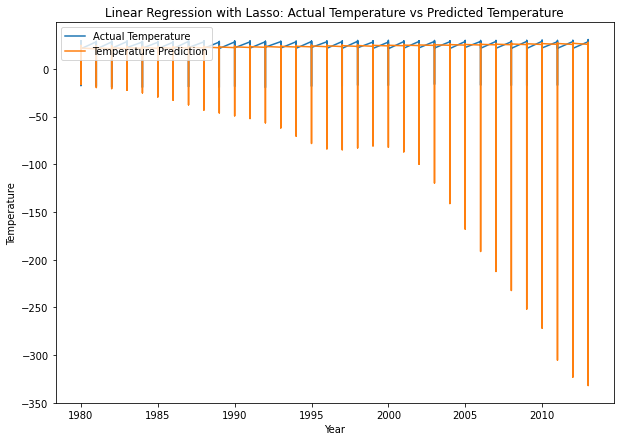

In [64]:
lasso_3_df = lasso_test_prediction_3.toPandas()
testing_df = testing_sdf.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(testing_df['year'], testing_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(lasso_3_df['year'], lasso_3_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Linear Regression with Lasso: Actual Temperature vs Predicted Temperature")
plt.show()

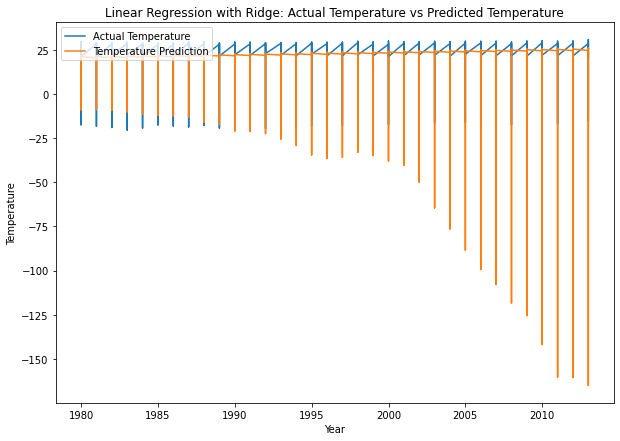

In [65]:
ridge_3_df = ridge_test_prediction_3.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(ridge_3_df['year'], ridge_3_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(ridge_3_df['year'], ridge_3_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Linear Regression with Ridge: Actual Temperature vs Predicted Temperature")
plt.show()

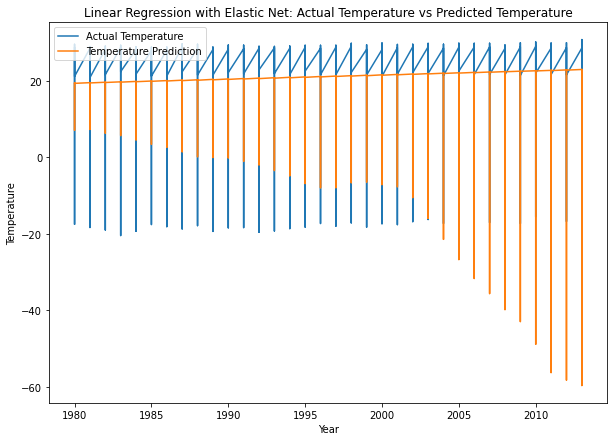

In [66]:
elastic_3_df = elastic_test_prediction_3.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(elastic_3_df['year'], elastic_3_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(elastic_3_df['year'], elastic_3_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Linear Regression with Elastic Net: Actual Temperature vs Predicted Temperature")
plt.show()

#### Random Forest Regression

In [69]:
rfc_3 = RandomForestRegressor(featuresCol="features",labelCol="AvgYearlyTemp", maxDepth = 30, numTrees=50)
rfModel_3 = rfc_3.fit(training_sdf)
rf_training_prediction_3 = rfModel_3.transform(training_sdf)
rf_test_prediction_3 = rfModel_3.transform(testing_sdf)
rf_training_prediction_mse_3 = evaluator.evaluate(rf_training_prediction_3, {evaluator.metricName: "mse"})
rf_training_prediction_mae_3 = evaluator.evaluate(rf_training_prediction_3, {evaluator.metricName: "mae"})
rf_test_prediction_mse_3 = evaluator.evaluate(rf_test_prediction_3, {evaluator.metricName: "mse"})
rf_test_prediction_mae_3 = evaluator.evaluate(rf_test_prediction_3, {evaluator.metricName: "mae"})

print("training mse:",rf_training_prediction_mse_3, "     training mae:", rf_training_prediction_mae_3)
print("    test mse:",rf_test_prediction_mse_3, "        test mae:", rf_test_prediction_mae_3)

training mse: 0.4468322316645581      training mae: 0.3711978324005331
    test mse: 40.430473694961215         test mae: 4.356539124629484


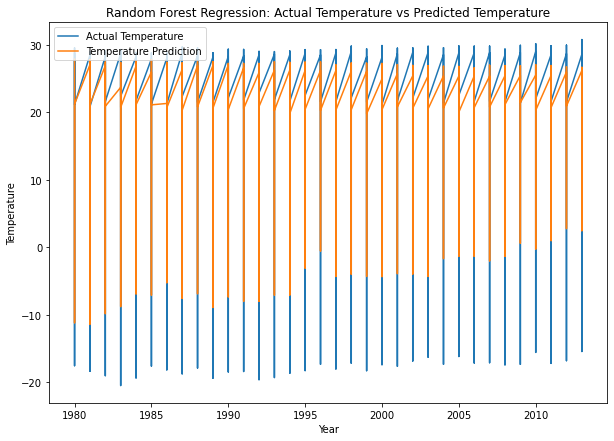

In [70]:
rf_3_df = rf_test_prediction_3.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(rf_3_df['year'], rf_3_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(rf_3_df['year'], rf_3_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("Random Forest Regression: Actual Temperature vs Predicted Temperature")
plt.show()

#### PCA

In [71]:
pca_3 = PCA(k=8, inputCol="features", outputCol="pcaFeatures")

# Set up PCA using Lasso Linear Regression
pca_lr_3 = LinearRegression(featuresCol='features',labelCol='AvgYearlyTemp',maxIter=10, regParam=1, elasticNetParam = 1)

# Fit the model using the training data
pca_pipe_3 = Pipeline(stages=[assembler,pca_3, pca_lr_3])
pca_training_sdf_3 = training_sdf.drop("features")
pca_model_3 = pca_pipe_3.fit(pca_training_sdf_3)
pca_training_prediction_3 = pca_model_3.transform(pca_training_sdf_3)

pca_test_sdf_3 = testing_sdf.drop("features")
pca_test_prediction_3 = pca_model_3.transform(pca_test_sdf_3)
pca_training_mse_3 = evaluator.evaluate(pca_training_prediction_3, {evaluator.metricName: "mse"})
pca_training_mae_3 = evaluator.evaluate(pca_training_prediction_3, {evaluator.metricName: "mae"})
pca_test_mse_3 = evaluator.evaluate(pca_test_prediction_3, {evaluator.metricName: "mse"})
pca_test_mae_3 = evaluator.evaluate(pca_test_prediction_3, {evaluator.metricName: "mae"})
print("training mse:", pca_training_mse_3, "   training mae:", pca_training_mae_3)
print("    test mse:", pca_test_mse_3, "       test mae:", pca_test_mae_3)

training mse: 68.49680965123656    training mae: 6.86937809796983
    test mse: 83.47466806694084        test mae: 7.019691746254154


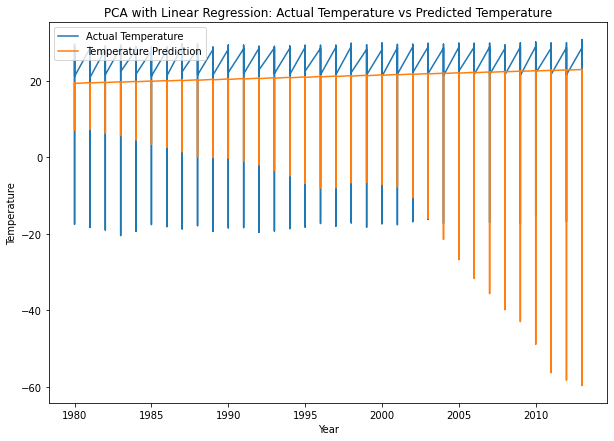

In [72]:
pca_3_df = pca_test_prediction_3.toPandas()
plt.figure(figsize=(10, 7))
plt.plot(pca_3_df['year'], pca_3_df['AvgYearlyTemp'], label = 'Actual Temperature')
plt.plot(pca_3_df['year'], pca_3_df['prediction'], label="Temperature Prediction")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.title("PCA with Linear Regression: Actual Temperature vs Predicted Temperature")
plt.show()

# SKLearn

In [292]:
# # split training x, y
# training_df = training_data.toPandas()
# training_x = training_df[['iso_code_labels', 'year', 'oil_co2_per_capita', 
#             'oil_co2', 'share_global_oil_co2', 'cumulative_oil_co2',
#             'share_global_cumulative_oil_co2', 'co2_growth_abs', 
#             'co2_per_capita', 'co2', 'share_global_co2', 'cumulative_co2',
#             'share_global_cumulative_co2', 'co2_growth_prct', 'population']]
# training_y = training_df['AvgYearlyTemp']

# # split test x, y
# testing_df = testing_data.toPandas()
# testing_x = testing_df[['iso_code_labels', 'year', 'oil_co2_per_capita', 
#             'oil_co2', 'share_global_oil_co2', 'cumulative_oil_co2',
#             'share_global_cumulative_oil_co2', 'co2_growth_abs', 
#             'co2_per_capita', 'co2', 'share_global_co2', 'cumulative_co2',
#             'share_global_cumulative_co2', 'co2_growth_prct', 'population']]
# testing_y = testing_df['AvgYearlyTemp']

In [293]:
# print("training shape:", training_x.shape, training_y.shape)
# print("testing shape:", testing_x.shape, testing_y.shape)

training shape: (7763, 15) (7763,)
testing shape: (5688, 15) (5688,)


In [294]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaled_training_x = scaler.fit_transform(training_x)
# scaled_testing_x = scaler.transform(testing_x)

#### Linear Regression

In [182]:
# from sklearn.linear_model import LinearRegression

# lr_3 = LinearRegression()
# lr_3.fit(scaled_training_x, training_y.values)
# lr_training_accuracy_3 = lr_3.score(scaled_training_x, training_y.values)

# lr_3_predictions = lr_3.predict(scaled_testing_x)
# testing_accuracy_3 = lr_3.score(scaled_testing_x, testing_y)

# print("training accuracy:", training_accuracy_3)
# print("validation accuracy:", validation_accuracy_3)
# print("testing accuracy:", testing_accuracy_3)

training accuracy: -0.9811938708322814
validation accuracy: -1.894672532312836
testing accuracy: -2.7256238003553555


In [73]:
# lr_df_3 = lr_3_predictions.toPandas()
# plt.figure(figsize=(9, 5))
# plt.plot(lr_df_3['year'], lr_df_3['AvgYearlyTemp'], label = 'Actual Temperature')
# plt.plot(lr_df_3['year'], lr_df_3['prediction'], label="Temperature Prediction")
# plt.xlabel('Year')
# plt.ylabel('Temperature')
# plt.legend(loc='lower left')
# plt.show()

#### RandomForestRegression

In [ ]:
# from sklearn.model_selection import GridSearchCV

# def print_best_params(results):
#     print('best_params: {}\n'.format(results.best_params_))

# rf_3 = RandomForestRegressor()
# param_grid = { 
#     'n_estimators': [30, 50, 100],
#     'max_depth' : [20, 30, 50]
# }
# rf_cv = GridSearchCV(rf_3,param_grid)
# rf_cv.fit(scaled_training_x, training_y)

# print_best_params(rf_cv)

In [149]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import accuracy_score

# rf_3 = RandomForestRegressor(max_depth= 50, n_estimators = 50)
# rf_3.fit(scaled_training_x, training_y)
# rf_training_accuracy_3 = rf_3.score(scaled_training_x, training_y)
# rf_3.fit(scaled_validation_x, validation_y)
# rf_validation_accuracy_3 = rf_3.score(scaled_validation_x, validation_y)
# rf_testing_predictions_3 = rf_3.predict(scaled_testing_x)
# rf_testing_accuracy_3 = rf_3.score(scaled_testing_x, testing_y)

# print("training accuracy:", rf_training_accuracy_3)
# print("validation accuracy:", rf_validation_accuracy_3)
# print("test accuracy:", rf_testing_accuracy_3)


training accuracy: 0.9969426398174606
validation accuracy: 0.9957118731379261
test accuracy: 0.5029783872176332


#### PCA

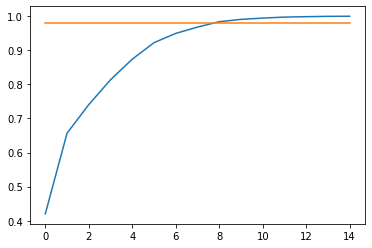

In [155]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=15)
# x_train_pca = pca.fit_transform(scaled_training_x)
# x_test_pca = pca.transform(scaled_testing_x)
# pca_components = pca.components_

# # Explained variance
# np.set_printoptions(suppress=True)
# pca_ratio = pca.explained_variance_ratio_
# plt.plot(np.arange(0, 15), np.cumsum(pca.explained_variance_ratio_))
# plt.plot(np.arange(0, 15), [0.98]*15)
# plt.show()

In [161]:
# new_pca = PCA(n_components=8)
# x_train = new_pca.fit_transform(scaled_training_x)
# pca_training_accuracy = new_pca.score(scaled_training_x, training_y)
# x_validate = new_pca.fit_transform(scaled_validation_x, validation_y)
# pca_validation_accuracy = new_pca.score(scaled_validation_x, validation_y)
# x_test = new_pca.transform(scaled_testing_x)
# pca_testing_accuracy = new_pca.score(scaled_testing_x, testing_y)
# print(pca_training_accuracy)
# print(pca_validation_accuracy)
# print(pca_testing_accuracy)

-11.568632216076203
-10.998562307368173
-165.07709042433152
